In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Coleta de Dados

In [44]:
rec_url = 'https://www.pro-football-reference.com/years/2022/receiving.htm'
rec_df = pd.read_html(rec_url)[0]

rush_url = 'https://www.pro-football-reference.com/years/2022/rushing.htm'
rb_df = pd.read_html(rush_url, header=1)[0]

qb_url = 'https://www.pro-football-reference.com/years/2022/passing.htm'
qb_df = pd.read_html(qb_url)[0]

# 2. WR

##2.1 Modelagem

In [139]:
wr_df = rec_df

In [140]:
wr_df.drop(wr_df[wr_df['Rec'] == 'Rec'].index, inplace = True)
wr_df[['Age', 'G', 'GS', 'Tgt', 'Rec', 'Yds', 'Y/R', 'TD', 'Y/Tgt', 'R/G', 'Y/G']] = wr_df[['Age', 'G', 'GS', 'Tgt', 'Rec', 'Yds', 'Y/R', 'TD', 'Y/Tgt', 'R/G', 'Y/G']].apply(pd.to_numeric)
wr_df = wr_df[['Tm', 'Pos','Age', 'G', 'GS', 'Tgt', 'Rec', 'Yds', 'Y/R', 'TD', 'Y/Tgt', 'R/G', 'Y/G']]

In [ ]:
wr_df.query('Pos == "WR"', inplace=True)
wr_df.query('Rec >= 10', inplace=True)
wr_df.query('Tgt >= 10', inplace=True)

In [142]:
wr_rcp_td_df = wr_df[['R/G', 'Y/G']]

In [143]:
model = LinearRegression()

In [144]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    wr_rcp_td_df.drop(['Y/G'], axis=1),
    wr_rcp_td_df['Y/G'],
    test_size=0.25,
    random_state=123
)

In [145]:
model = model.fit(predictors_train, target_train)

In [146]:
target_predicted = model.predict(predictors_test)

In [147]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

7.386753277850795


In [148]:
test_data = pd.concat([predictors_test, pd.DataFrame(target_test, columns=['Y/G'])], axis=1).reset_index(drop=True)
test_data['predicted'] = False
prediction_data = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['Y/G'])], axis=1).reset_index(drop=True)
prediction_data['predicted'] = True
prediction = pd.concat([test_data, prediction_data]).reset_index(drop=True)

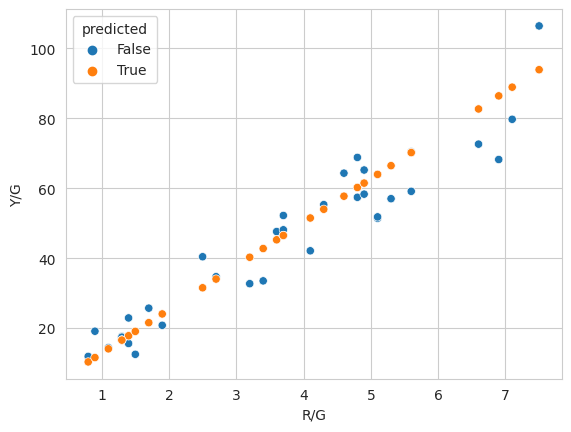

In [153]:
with sns.axes_style('whitegrid'):

  sns.scatterplot(data=prediction, x='R/G', y='Y/G', hue='predicted')
plt.savefig('wr_nfl.png')

EXEMPLO: Um Wide Receiver com uma média de 10 recepções, teria em média quantas jardas por jogo?



In [150]:
jogador = np.array([8])

In [151]:
Y_G = model.predict(jogador.reshape(1, -1))
print(Y_G)

[100.11491737]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##2.2 Conclusões

Pode-se notar que quanto mais recepções por jogo, mais jardas por jogo. E para superar as 100 jardas, em média, deve ter uma média de 8 recepções.

#3. RB

##3.1 Modelagem

In [154]:
rb_df.drop(rb_df[rb_df['Att'] == 'Att'].index, inplace = True)
rb_df[['Age', 'G', 'GS', 'Att', 'Yds', 'TD', 'Y/A', 'Y/G']] = rb_df[['Age', 'G', 'GS', 'Att', 'Yds', 'TD', 'Y/A', 'Y/G']].apply(pd.to_numeric)
rb_df = rb_df[['Tm', 'Pos','Age', 'G', 'GS', 'Att', 'Yds', 'TD', 'Y/A', 'Y/G']]
rb_df['TD/G'] = rb_df['TD'] / rb_df['G']

In [155]:
rb_df.query('Pos == "RB"', inplace=True)
rb_df.query('Att >= 10', inplace=True)
rb_df.query('Yds >= 100', inplace=True)

In [156]:
rb_y_td_df = rb_df[['Y/G', 'TD/G']]

In [157]:
model = LinearRegression()

In [164]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    rb_y_td_df.drop(['TD/G'], axis=1),
    rb_y_td_df['TD/G'],
    test_size=0.25,
    random_state=123
)

In [165]:
model = model.fit(predictors_train, target_train)

In [166]:
target_predicted = model.predict(predictors_test)

In [167]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

0.09647806044794342


In [168]:
test_data = pd.concat([predictors_test, pd.DataFrame(target_test, columns=['TD/G'])], axis=1).reset_index(drop=True)
test_data['predicted'] = False
prediction_data = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['TD/G'])], axis=1).reset_index(drop=True)
prediction_data['predicted'] = True
prediction = pd.concat([test_data, prediction_data]).reset_index(drop=True)

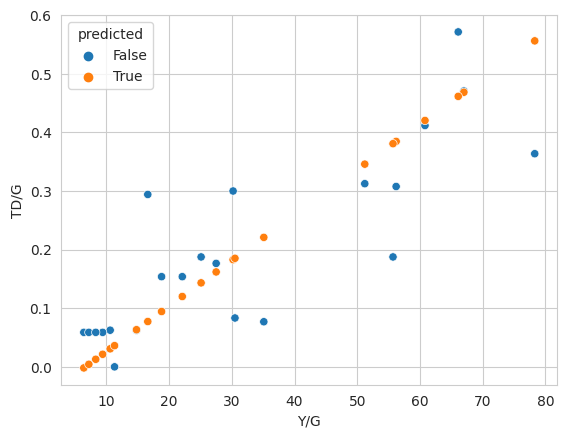

In [169]:
with sns.axes_style('whitegrid'):

  sns.scatterplot(data=prediction, x='Y/G', y='TD/G', hue='predicted')
plt.savefig('rb_nfl.png')

EXEMPLO: Um Running Back com média de 140 jardas, teria em média quantos Touchdowns por jogo?



In [180]:
RB = np.array([140])

In [181]:
TD = model.predict(RB.reshape(1, -1))
print(TD)

[1.03503239]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##3.2 Conclusões

Observa-se que quanto mais jardas por jogo tem um RB, maior a probabilidade de fazer um TD por jogo.
Também nota-se que para fazer 1 TD seria necessário aproximadamente 140 jardas.

#4. QB

##4.1 Modelagem

In [182]:
qb_df.drop(qb_df[qb_df['Att'] == 'Att'].index, inplace = True)
qb_df[['Age', 'G', 'GS', 'Att', 'Yds', 'TD', 'Y/A', 'Y/G']] = qb_df[['Age', 'G', 'GS', 'Att', 'Yds', 'TD', 'Y/A', 'Y/G']].apply(pd.to_numeric)
qb_df = qb_df[['Tm', 'Pos','Age', 'G', 'GS', 'Att', 'Yds', 'TD', 'Y/A', 'Y/G']]
qb_df['TD/G'] = qb_df['TD'] / qb_df['G']

In [183]:
qb_df.query('Pos == "QB"', inplace=True)
qb_df.query('Att >= 10', inplace=True)
qb_df.query('Yds >= 100', inplace=True)

In [184]:
qb_y_td_df = qb_df[['Y/G', 'TD/G']]

In [185]:
model = LinearRegression()

In [186]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    qb_y_td_df.drop(['TD/G'], axis=1),
    qb_y_td_df['TD/G'],
    test_size=0.25,
    random_state=123
)

In [187]:
model = model.fit(predictors_train, target_train)

In [188]:
target_predicted = model.predict(predictors_test)

In [189]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

0.2845256020948012


In [190]:
test_data = pd.concat([predictors_test, pd.DataFrame(target_test, columns=['TD/G'])], axis=1).reset_index(drop=True)
test_data['predicted'] = False
prediction_data = pd.concat([predictors_test.reset_index(drop=True), pd.DataFrame(target_predicted, columns=['TD/G'])], axis=1).reset_index(drop=True)
prediction_data['predicted'] = True
prediction = pd.concat([test_data, prediction_data]).reset_index(drop=True)

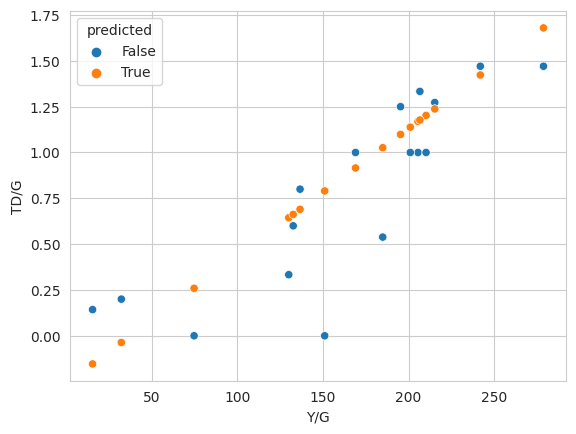

In [191]:
with sns.axes_style('whitegrid'):

  sns.scatterplot(data=prediction, x='Y/G', y='TD/G', hue='predicted')
plt.savefig('qb_nfl.png')

EXEMPLO: Um Quarter Back com uma média de 190 jardas, teria em média quantos Touchdowns por jogo?





In [198]:
QB = np.array([190])

In [199]:
TD = model.predict(QB.reshape(1, -1))
print(TD)

[1.06165395]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##4.2 Conclusões

Pode-se notar que há um aumento no número de TDs quanto mais jardas por jogo tem o QB, apesar de alguma excessões com 0 TD mesmo com a média de 150 jardas por jogo.
Também observa-se que para ter 1 TD, seria preciso em média 190 jardas por jogo.